In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

C:\Users\niraj\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
df=pd.read_excel("cc.xls")

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.shape

(30000, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [10]:
df=df.rename(columns={'default payment next month':'default'})

In [11]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

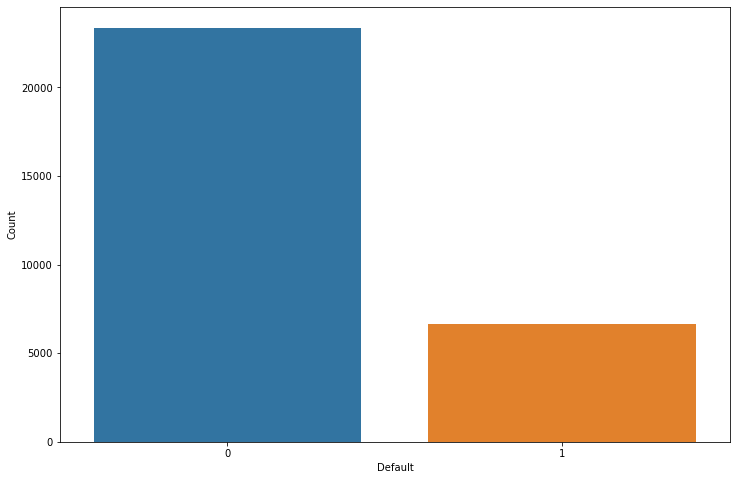

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x="default", data=df)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

In [16]:
df2=df.copy()

In [17]:
#for seeing the ration of genders

In [18]:
def sex1(x):
    if(x==1):
        return "Male"
    else:
        return "Female"
    
df2["SEX"]=df["SEX"].apply(sex1)    

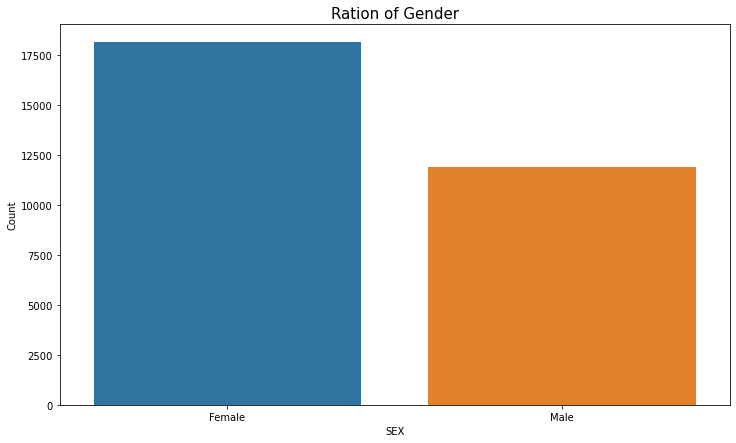

In [20]:
plt.figure(figsize=(12,7))
df2.SEX.value_counts()
sns.countplot(x="SEX", data=df2)
plt.title("Ration of Gender", size=15)
plt.xlabel("SEX")
plt.ylabel("Count")
plt.show()

In [22]:
#so female is larger in numbers


In [23]:
df2.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [24]:
# SO THERE are 7 types of education but0,5,4,6 are smaller in munbers so we will merge it in 4 and make it others


In [25]:
def edu(x):
    if(x==0) or(x==4) or (x==6):
        x=4
        return x
        
    

In [26]:
df['EDUCATION']=df['EDUCATION'].apply(edu)
df2['EDUCATION']=df2['EDUCATION'].apply(edu)

In [50]:
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
df2['EDUCATION']=df2['EDUCATION'].apply(edu1)

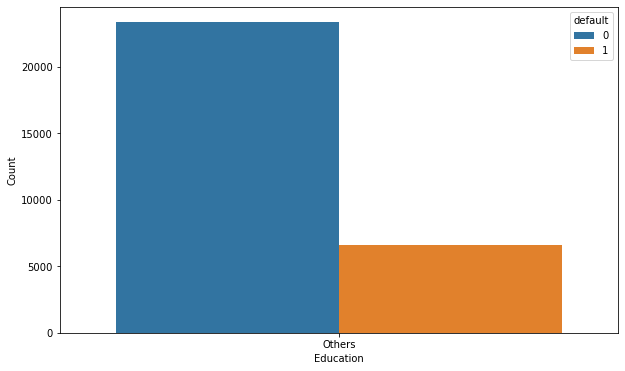

In [55]:
plt.figure(figsize=(10,6))
df2.EDUCATION.value_counts()
sns.countplot(x="EDUCATION", hue="default", data=df2)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

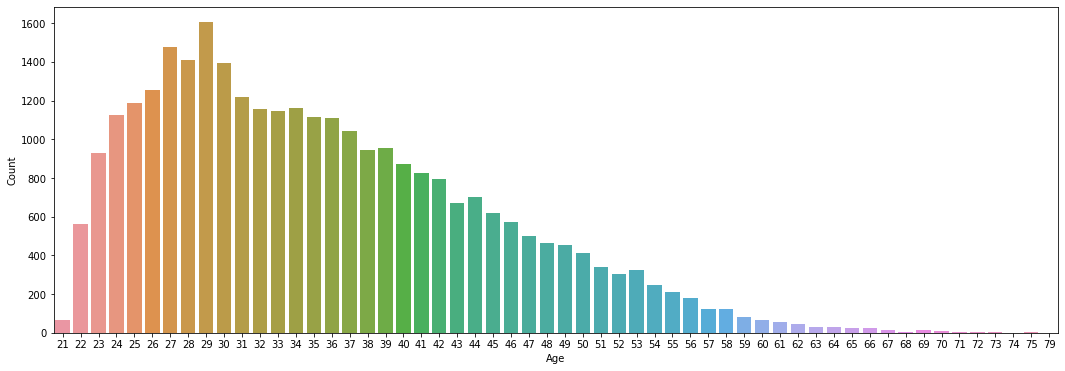

In [57]:
plt.figure(figsize=(18,6))
age=df2['AGE'].value_counts().reset_index()
sns.barplot(x='index', y='AGE', data=age, orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [58]:
# for this Outlier is important

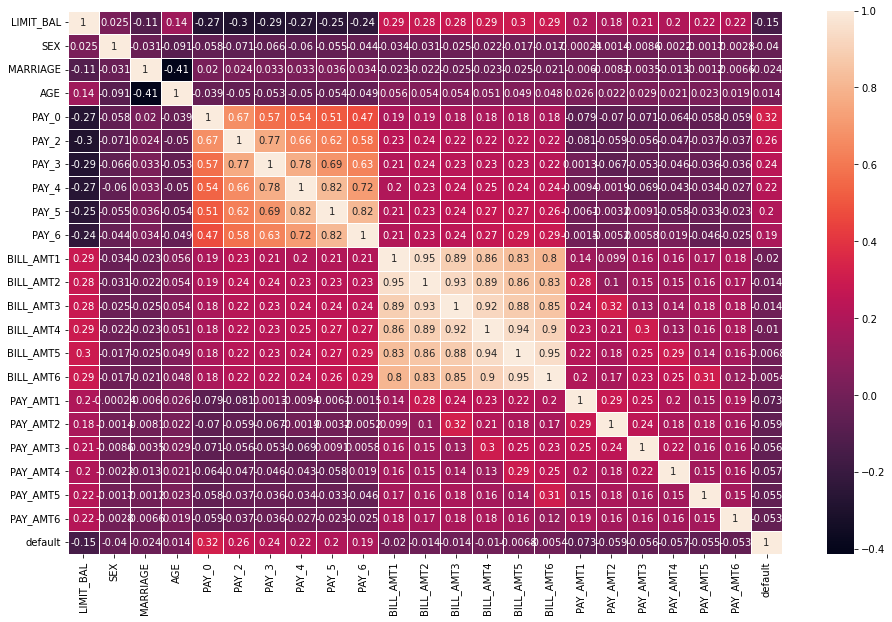

In [59]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), linewidths=.5, annot=True)
plt.show()

In [60]:
#We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.

In [61]:
df1=df.copy()
df1=pd.get_dummies(df1, columns=["SEX"])
df1=pd.get_dummies(df1, columns=["EDUCATION"])
df1=pd.get_dummies(df1, columns=["MARRIAGE"])

In [62]:
df1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,default,SEX_1,SEX_2,EDUCATION_Others,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,1,1,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,1,1,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,0,1,1,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,0,1,1,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,5000,1000,0,1,0,1,0,1,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,0,0,1,0,1,0,0,1,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,2000,3100,1,1,0,1,0,0,1,0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,52964,1804,1,1,0,1,0,1,0,0


In [63]:
df1.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_1', 'SEX_2',
       'EDUCATION_Others', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [64]:
#splitting the data in for trainning

In [65]:
x=df1.drop(labels=['default'], axis=1)

In [66]:
x.shape

(30000, 27)

In [67]:
y=df1['default']

In [68]:
y.shape

(30000,)

In [69]:
#importing machine learning libraries

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [71]:
from sklearn import metrics

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [73]:
import statsmodels.formula.api as smf

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso, Ridge

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
from sklearn.svm import LinearSVC, SVC, SVR

In [82]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [83]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.33, random_state=42)

In [89]:
x_train.shape

(20100, 27)

In [90]:
model=LogisticRegression()

model

In [91]:
model

LogisticRegression()

In [92]:
model.fit(x_train, y_train)

C:\Users\niraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
train_pred=model.predict(x_train)

In [94]:
test_pred=model.predict(x_test)

In [96]:
print(classification_report(train_pred, y_train))
print('\n Accuracy Score for model1(testing):', accuracy_score(train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     20092
           1       0.00      0.50      0.00         8

    accuracy                           0.78     20100
   macro avg       0.50      0.64      0.44     20100
weighted avg       1.00      0.78      0.87     20100


 Accuracy Score for model1(testing): 0.7772139303482587


In [97]:
print(classification_report(train_pred, y_train))
print('\n Accuracy Score for model1(testing):', accuracy_score(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     20092
           1       0.00      0.50      0.00         8

    accuracy                           0.78     20100
   macro avg       0.50      0.64      0.44     20100
weighted avg       1.00      0.78      0.87     20100


 Accuracy Score for model1(testing): 0.7821212121212121


In [98]:
#Scalling

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [102]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [103]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [104]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
classifier=RandomForestClassifier()

In [118]:
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [120]:
y_pred=classifier.predict(x_test)

In [121]:
print(confusion_matrix(y_test, y_pred))

[[7270  472]
 [1352  806]]


In [122]:
print(accuracy_score(y_test, y_pred))

0.8157575757575758


In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7742
           1       0.63      0.37      0.47      2158

    accuracy                           0.82      9900
   macro avg       0.74      0.66      0.68      9900
weighted avg       0.80      0.82      0.80      9900



In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
gnb=GaussianNB(var_smoothing=0.5)

In [126]:
gnb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.5)

In [127]:
y_pred=gnb.predict(x_test)

In [129]:
print(confusion_matrix(y_test, y_pred))

[[7742    0]
 [2158    0]]


In [130]:
print(accuracy_score(y_test, y_pred))

0.7820202020202021


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7742
           1       0.00      0.00      0.00      2158

    accuracy                           0.78      9900
   macro avg       0.39      0.50      0.44      9900
weighted avg       0.61      0.78      0.69      9900



C:\Users\niraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
import xgboost as xgb

In [133]:
param_grid_xgboost={
    "n_estimators":[50,100,130],
    "max_depth":range(3,11,1),
    "random_state":[0,50,100]
    
}

grid=GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_grid_xgboost, verbose=3, cv=5, n_jobs=-1)

In [134]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [136]:
y_pred=grid.predict(x_test)

In [137]:
print(confusion_matrix(y_test, y_pred))

[[7342  400]
 [1382  776]]


In [138]:
print(accuracy_score(y_test, y_pred))

0.82


In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7742
           1       0.66      0.36      0.47      2158

    accuracy                           0.82      9900
   macro avg       0.75      0.65      0.68      9900
weighted avg       0.80      0.82      0.80      9900



In [140]:
param_grid={
    "n_neighbors":[3,4,5,6,7,8,9,10,11,12],
    "weights":['uniform','distance']
}

In [141]:
model=GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='f1_weighted')

In [142]:
model=model.fit(x_train, y_train)

In [143]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [144]:
knn=KNeighborsClassifier(n_neighbors=12, weights='distance')

In [145]:
knn1=knn.fit(x_train,y_train)

In [146]:
y_pred=knn1.predict(x_test)

In [147]:
print(confusion_matrix(y_test, y_pred))

[[7317  425]
 [1870  288]]


In [148]:
print(accuracy_score(y_test, y_pred))

0.7681818181818182


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.86      7742
           1       0.40      0.13      0.20      2158

    accuracy                           0.77      9900
   macro avg       0.60      0.54      0.53      9900
weighted avg       0.71      0.77      0.72      9900



In [150]:
import pickle

In [151]:
pickle.dump(classifier, open('model.pkl', 'wb'))
pickle_model=pickle.load(open('model.pkl', 'rb'))
pickle_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
df1.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,default,SEX_1,SEX_2,EDUCATION_Others,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,1,1,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,1,1,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,0,1,1,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,0,1,1,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,1,0,1,0,1,0,0
